In [ ]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(trainx, trainy), (testx, testy) = cifar10.load_data()

In [ ]:
type(trainx[0,0,0,0])

numpy.uint8

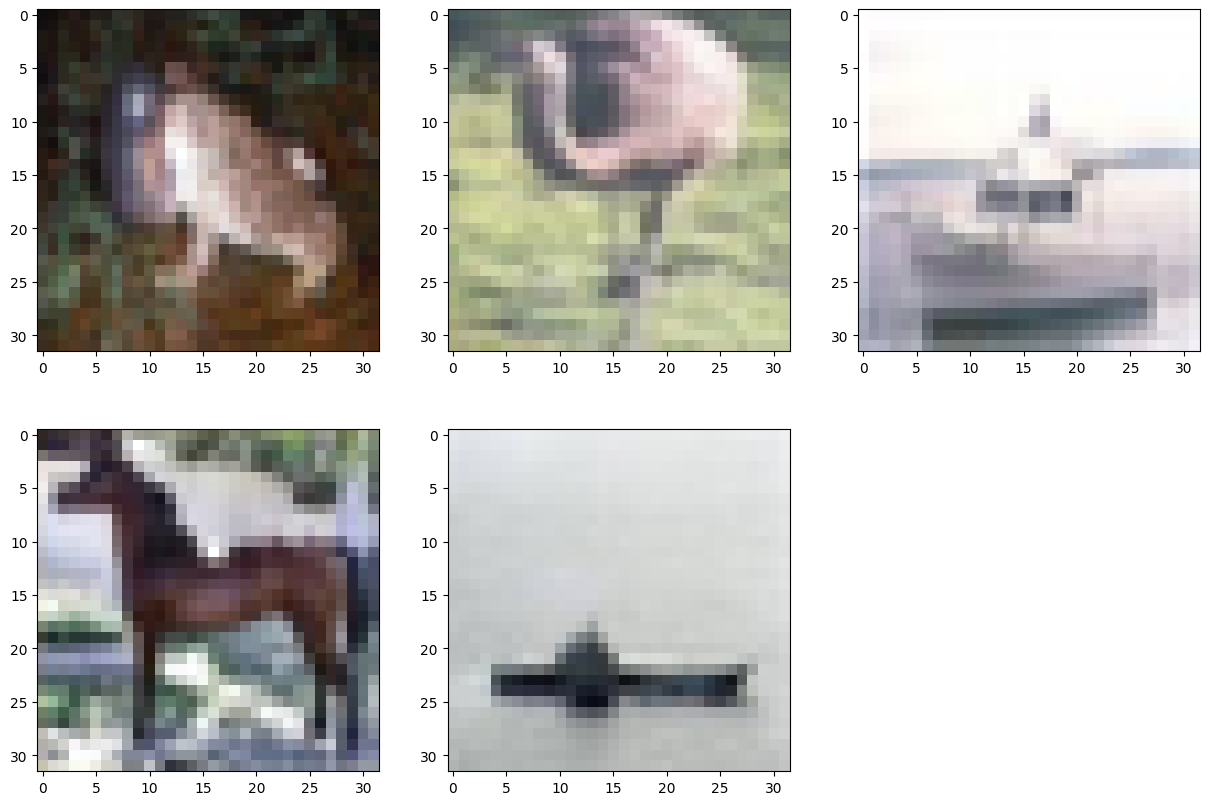

In [ ]:
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(15, 10))
for i in range(5):
  plt.subplot(230 + 1 + i)
  r = randint(0, 50000)
  plt.imshow(trainx[r])
plt.show()

In [ ]:
from keras.utils import to_categorical
x_train = trainx.astype('float32')/255.0
x_test = testx.astype('float32')/255.0
y_train = to_categorical(trainy)
y_test = to_categorical(testy)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, shuffle=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
def plot_acc_loss(checkpoint):
  plt.title('Loss')
  plt.plot(checkpoint.history['loss'], color='red', label='train')
  plt.plot(checkpoint.history['val_loss'], color='blue', label='validation')
  plt.legend()
  plt.show()
  plt.title('Accuracy')
  plt.plot(checkpoint.history['accuracy'], color='red', label='train')
  plt.plot(checkpoint.history['val_accuracy'], color='blue', label='validation')
  plt.legend()
  plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def score(model, xtest, ytest):
  model_pred = model.predict(xtest)
  pred = list()
  for i in range(model_pred.shape[0]):
    pred.append(np.argmax(model_pred[i,:]))
  p = precision_score(ytest, np.array(pred), average="macro")
  r = recall_score(ytest, np.array(pred), average="macro")
  f1 = f1_score(ytest, np.array(pred), average="macro")
  acc = accuracy_score(ytest, np.array(pred))
  print("Precision: " + str(p))
  print("Recall: " + str(r))
  print("F1 score: " + str(f1))
  print("Accuracy: " + str(acc))

In [ ]:
sgdopt = SGD(learning_rate=3e-3)
sgdmodel = create_model()
sgdmodel.compile(optimizer=sgdopt, loss='categorical_crossentropy', metrics=['accuracy'])
sgdcheckpoints = sgdmodel.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), batch_size=64)

Epoch 1/100
625/625 [==============================] - 9s 14ms/step - loss: 2.3012 - accuracy: 0.1098 - val_loss: 2.2993 - val_accuracy: 0.1484
Epoch 2/100
625/625 [==============================] - 8s 12ms/step - loss: 2.2954 - accuracy: 0.1241 - val_loss: 2.2895 - val_accuracy: 0.1564
Epoch 3/100
625/625 [==============================] - 8s 13ms/step - loss: 2.2731 - accuracy: 0.1433 - val_loss: 2.2407 - val_accuracy: 0.1910
Epoch 4/100
625/625 [==============================] - 9s 14ms/step - loss: 2.1951 - accuracy: 0.1933 - val_loss: 2.1151 - val_accuracy: 0.2476
Epoch 5/100
625/625 [==============================] - 8s 12ms/step - loss: 2.1061 - accuracy: 0.2395 - val_loss: 2.0340 - val_accuracy: 0.2629
Epoch 6/100
625/625 [==============================] - 8s 13ms/step - loss: 2.0480 - accuracy: 0.2521 - val_loss: 1.9728 - val_accuracy: 0.2839
Epoch 7/100
625/625 [==============================] - 8s 13ms/step - loss: 1.9995 - accuracy: 0.2643 - val_loss: 1.9358 - val_accuracy:

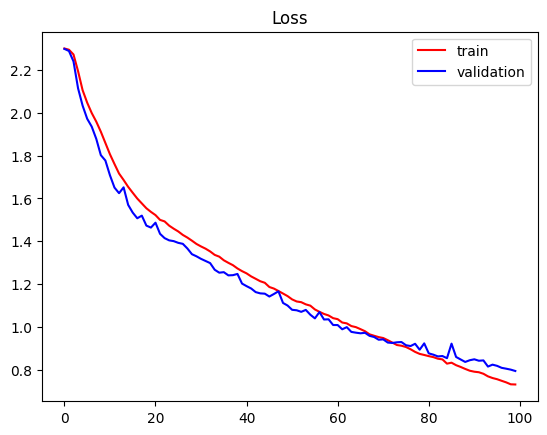

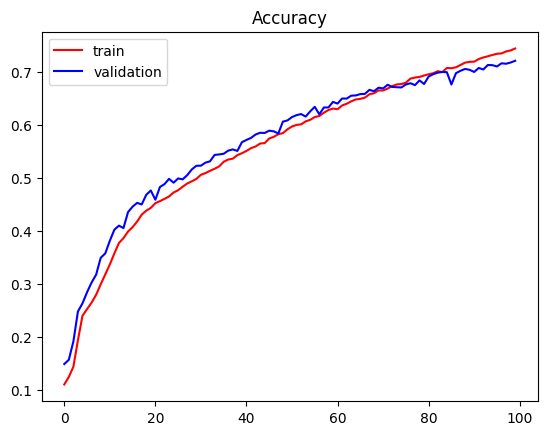

In [ ]:
plot_acc_loss(sgdcheckpoints)

In [ ]:
score(sgdmodel, x_test, testy)

313/313 [==============================] - 1s 3ms/step
Precision: 0.7216108160506393
Recall: 0.7230000000000001
F1 score: 0.7215421837993942
Accuracy: 0.723


In [ ]:
adamopt = Adam(learning_rate=3e-5)
adammodel = create_model()
adammodel.compile(optimizer=adamopt, loss='categorical_crossentropy', metrics=['accuracy'])
adamcheckpoints = adammodel.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), batch_size=128)

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 2.1824 - accuracy: 0.1761 - val_loss: 1.9281 - val_accuracy: 0.2819
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 1.8625 - accuracy: 0.3150 - val_loss: 1.7382 - val_accuracy: 0.3688
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 1.7285 - accuracy: 0.3695 - val_loss: 1.6460 - val_accuracy: 0.3917
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 1.6541 - accuracy: 0.3955 - val_loss: 1.5778 - val_accuracy: 0.4250
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 1.5989 - accuracy: 0.4140 - val_loss: 1.5144 - val_accuracy: 0.4441
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 1.5551 - accuracy: 0.4320 - val_loss: 1.4737 - val_accuracy: 0.4588
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 1.5211 - accuracy: 0.4484 - val_loss: 1.4459 - val_accuracy:

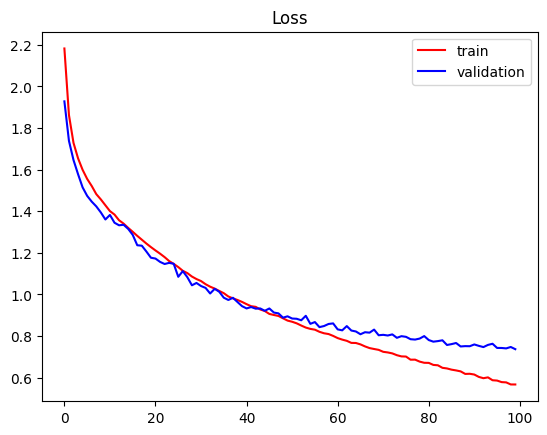

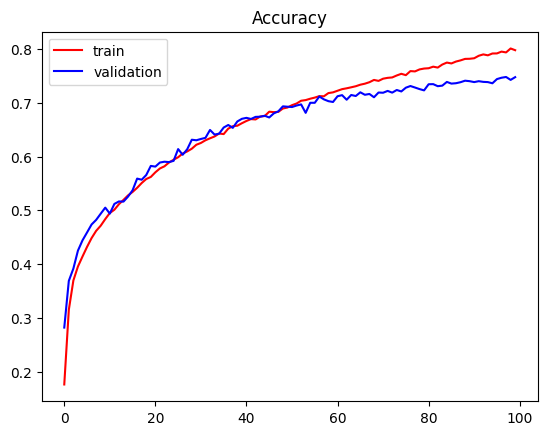

In [ ]:
plot_acc_loss(adamcheckpoints)

In [ ]:
score(adammodel, x_test, testy)

313/313 [==============================] - 1s 3ms/step
Precision: 0.7445282915772651
Recall: 0.7468999999999999
F1 score: 0.7445494434994371
Accuracy: 0.7469


In [ ]:
rmsopt = RMSprop(learning_rate=3e-5)
rmsmodel = create_model()
rmsmodel.compile(optimizer=rmsopt, loss='categorical_crossentropy', metrics=['accuracy'])
rmscheckpoints = rmsmodel.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), batch_size=128)

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 2.1946 - accuracy: 0.1722 - val_loss: 2.0294 - val_accuracy: 0.2461
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 2.0136 - accuracy: 0.2573 - val_loss: 1.9286 - val_accuracy: 0.2902
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 1.9186 - accuracy: 0.2987 - val_loss: 1.8117 - val_accuracy: 0.3465
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 1.8135 - accuracy: 0.3404 - val_loss: 1.8532 - val_accuracy: 0.3328
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 1.7414 - accuracy: 0.3690 - val_loss: 1.6472 - val_accuracy: 0.4050
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 1.6867 - accuracy: 0.3837 - val_loss: 1.6637 - val_accuracy: 0.3944
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 1.6409 - accuracy: 0.4032 - val_loss: 1.5843 - val_accuracy

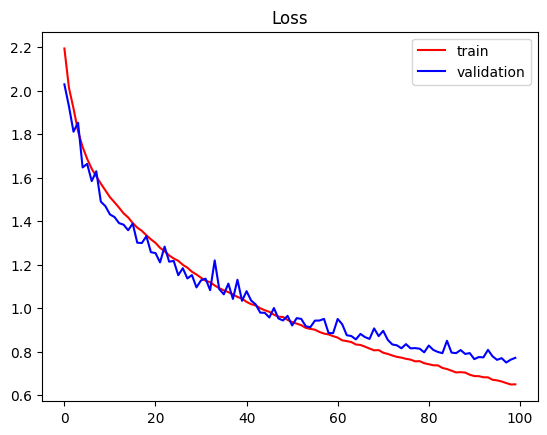

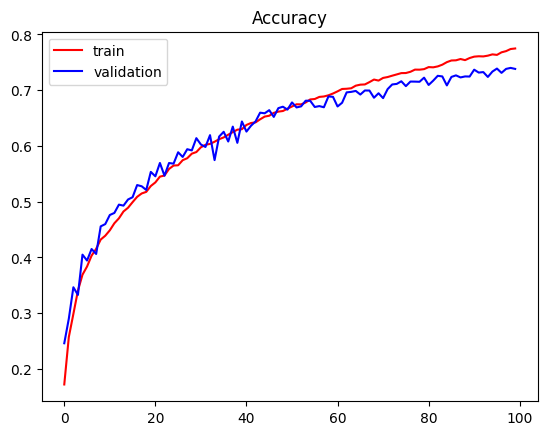

In [ ]:
plot_acc_loss(rmscheckpoints)

In [ ]:
score(rmsmodel, x_test, testy)

313/313 [==============================] - 1s 2ms/step
Precision: 0.7389936369993878
Recall: 0.7356
F1 score: 0.7346818072053265
Accuracy: 0.7356
